# Task - 4 (Stock Market Prediction using Numerical and Textual Analysis)

Create a hybrid model for stock price/performance prediction using
numerical analysis of historical stock prices, and sentimental analysis of news headlines 

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
● Download historical stock prices from:- https://finance.yahoo.com
● Download textual (news) data from:- https://bit.ly/36fFPI6



# Sentiment Aanalysis of news

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar.var_model import VAR
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import scipy.stats as stats

In [2]:
# import dataset
news_data = pd.read_csv('india-news-headlines.csv')
news_data.head()

,Date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [3]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Date               int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [4]:
# Dates are convret into integer
news_data['Dates'] = np.array([str(str(str(x)[:4]) + '/' + str(str(x)[4:6])+'/'+ str(str(x)[6:])) for x in news_data['Date']])
news_data.head()


,Date,headline_category,headline_text,Dates
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,20010102,unknown,America's unwanted heading for India?,2001/01/02
4,20010102,unknown,For bigwigs; it is destination Goa,2001/01/02


In [5]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Date               int64 
 1   headline_category  object
 2   headline_text      object
 3   Dates              object
dtypes: int64(1), object(3)
memory usage: 100.6+ MB


In [6]:
# drop the date column
news_data = news_data.drop('Date',axis=1)

In [7]:
news_data.head(3)

,headline_category,headline_text,Dates
0,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,unknown,Fissures in Hurriyat over Pak visit,2001/01/02


In [8]:
#let's visualise data
pro_df =news_data.copy()

In [9]:
# let's See top-20 headlines-Category
pro_df["Category"] = pro_df["headline_category"].str.split(".").map(lambda x : x[0])

In [10]:
top_categories = pro_df.groupby(['Category']).agg({'headline_text':'count'}).sort_values(by='headline_text', ascending = False)

In [11]:
top_20 = top_categories.drop(['unknown']).head(20)

In [12]:
top_20

,headline_text
Category,
city,1842498
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
world,63054
life-style,43370
tv,37819


In [13]:
top_20.reset_index(inplace=True)

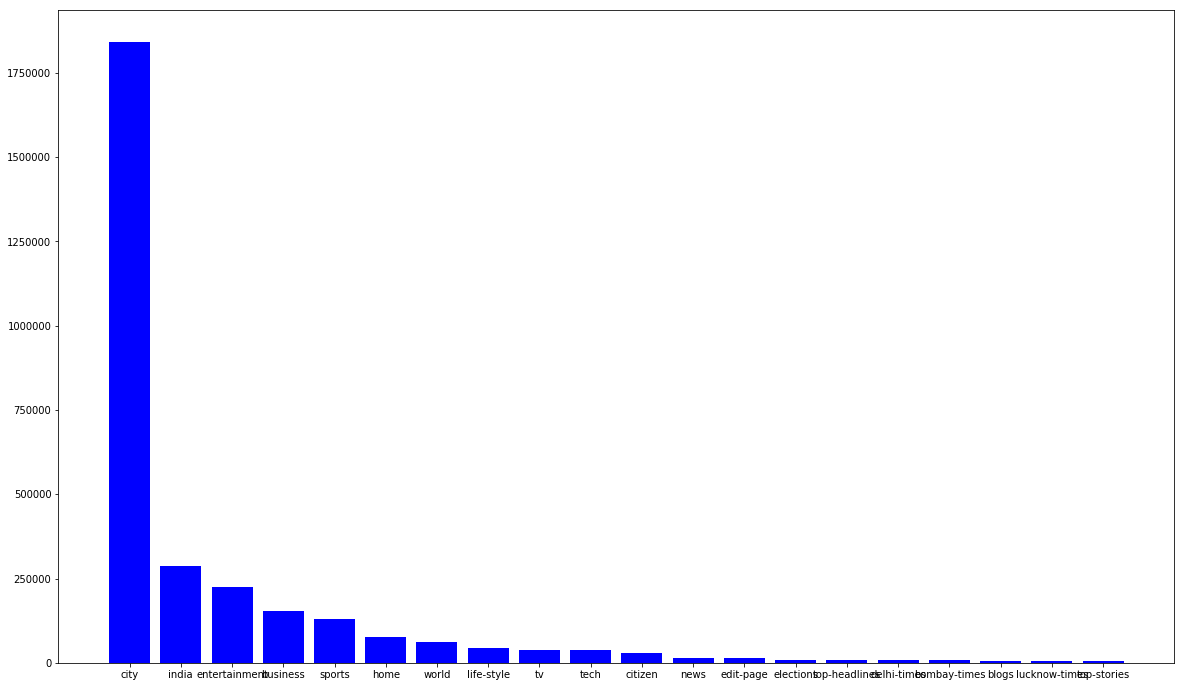

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,12))
plt.bar(top_20.Category, height=top_20.headline_text, color="blue")
plt.show()

In [15]:
top_20 = top_categories.drop(['unknown','city']).head(20)
top_20

,headline_text
Category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
world,63054
life-style,43370
tv,37819
tech,37220


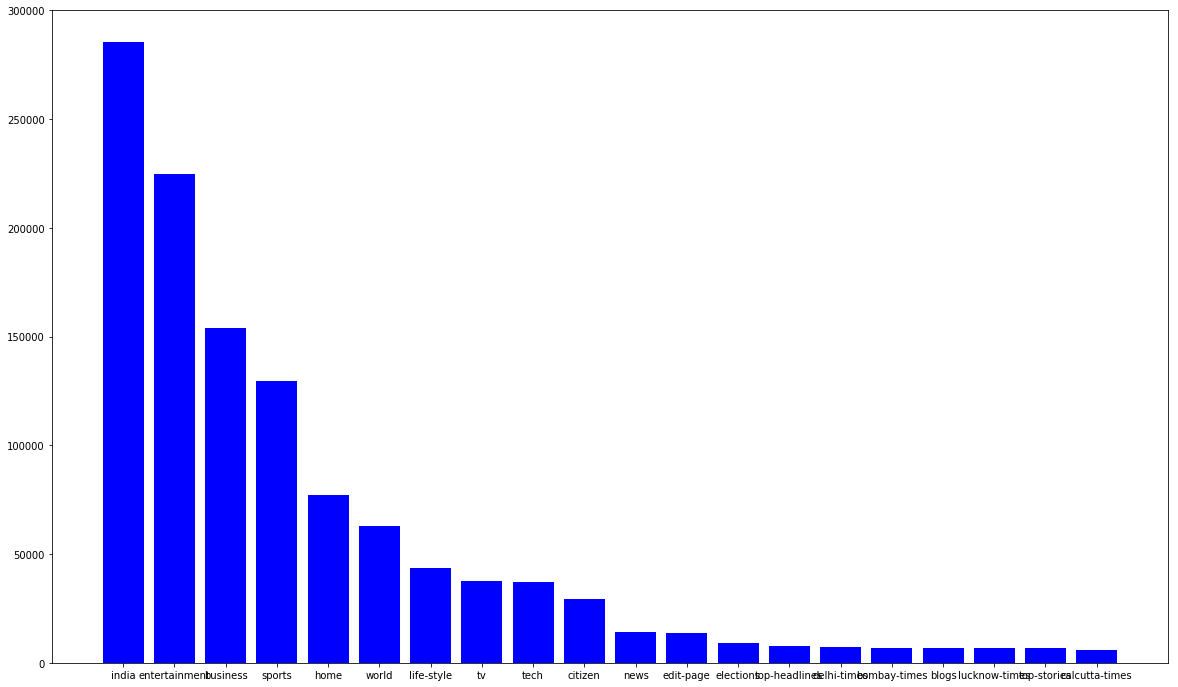

In [16]:
top_20.reset_index(inplace=True)
import matplotlib.pyplot as plt
plt.figure(figsize = (20,12))
plt.bar(top_20.Category, height=top_20.headline_text, color="blue")
plt.show()

In [17]:
# Dates are convert into datetime
news_data['Dates'] = pd.to_datetime(news_data['Dates'])

In [18]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   headline_category  object        
 1   headline_text      object        
 2   Dates              datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [19]:
news_data = news_data[['Dates','headline_text']]

In [20]:
news_data.columns = ['Dates','headline']

In [21]:
news_data.head(3)

,Dates,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit


In [23]:
Dict_news = {}

temp1 = news_data.loc[0,'Dates']
temp2 = news_data.loc[0,'headline']
for i in range(1, len(news_data)):
    if news_data.loc[i,'Dates']==temp1:
        temp2 += '.' + str(news_data.loc[i, 'headline'])
    else:
        Dict_news[news_data.loc[i-1, 'Dates']]=temp2
        temp2=""
        temp1 = news_data.loc[i,'Dates']

In [24]:
len(Dict_news)

7079

In [25]:
index = np.arange(0, len(Dict_news))

In [26]:
news_df = pd.DataFrame(index)

In [27]:
news_df.head()

,0
0,0
1,1
2,2
3,3
4,4


In [28]:
news_df['Dates'] = Dict_news.keys()

In [29]:
news_df.head()

,0,Dates
0,0,2001-01-01
1,1,2001-01-02
2,2,2001-01-03
3,3,2001-01-04
4,4,2001-01-05


In [30]:
M =[]
for i in Dict_news.keys():
    M.append(Dict_news[i])

In [31]:
M[1]

".Fissures in Hurriyat over Pak visit.America's unwanted heading for India?.For bigwigs; it is destination Goa.Extra buses to clear tourist traffic.Dilute the power of transfers; says Riberio.Focus shifts to teaching of Hindi.IT will become compulsory in schools.Move to stop freedom fighters' pension flayed.Gilani claims he applied for passport 2 years ago.Parivar dismisses PM's warning.India; Pak exchange lists of N-plants.Will Qureshi's return really help the govt?.PM's tacit message: Put Ram tample on hold.Text of the Prime Minister's article.NCW to focus on violence against women.BBC's reality TV will focus on AIIMS.Jaitley firm on legal reforms.Hoshangabad farmers have enough water.BJP jumps into rail track conversion issue.America's unwanted heading for India?.State may take AP to court over Krishna.This official has sued the briber.Park turns temple compound as residents watch.Moves afoot to evict squatters in Urban dist.Mafia calls the shots in Gandhinagar too.Status quo will n

In [32]:
news_df['headline'] = np.array(M)

In [33]:
news_df.head(2)

,0,Dates,headline
0,0,2001-01-01,win over cena satisfying but defeating underta...
1,1,2001-01-02,.Fissures in Hurriyat over Pak visit.America's...


In [34]:
news_df = news_df.drop(0, axis=1)

In [35]:
news_df.tail()

,Dates,headline
7074,2020-06-25,.Telangana: Senior Congress leader tests+ve fo...
7075,2020-06-26,.up hammers out 60k proposals of rs 870cr ahea...
7076,2020-06-27,.Major Ravi to helm movie on Indo-Chinese conf...
7077,2020-06-28,.Sports without spectators: 'Who will cheer fo...
7078,2020-06-29,.Anna Eden gets creative with husband and MP H...


In [36]:
# Sentiment anlysis on news data
polarity = []
subjectivity = []
tuples = []
for i in news_df['headline'].values:
    my_values = TextBlob(i)
    tuples.append(my_values.sentiment)

In [37]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [38]:
news_df['polarity'] = np.array(polarity)
news_df['Subjectivity'] = np.array(subjectivity)

In [39]:
news_df.head()

,Dates,headline,polarity,Subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,.Fissures in Hurriyat over Pak visit.America's...,0.113725,0.254902
2,2001-01-03,.Think again; Laxman tells Sangh Parivar.Hurri...,0.184375,0.403125
3,2001-01-04,.Vajpayee gives big push to tech education; R&...,0.132492,0.473506
4,2001-01-05,.Hawkings' day out.Light combat craft takes In...,0.250480,0.455474


In [40]:
temp1 =['positive','neutral','negative']
temp2 = ['subjective','objective']
polarity =[]
subjectivity = []
for i in range(len(news_df)):
    Ply = news_df.iloc[i]['polarity']
    Sbj = news_df.iloc[i]['Subjectivity']
    if Ply>=0:
        if Ply>=0.2:
            polarity.append(temp1[0])
        else:
            polarity.append(temp1[1])
    else:
        if Ply<=-0.2:
            polarity.append(temp1[2])
        else:
            polarity.append(temp1[1])
            
    if Sbj>=0.4:
        subjectivity.append(temp2[1])
    else:
        subjectivity.append(temp2[0])

In [41]:
news_df['sentiment'] = polarity
news_df['opinion'] = subjectivity

In [42]:
news_df.head()

,Dates,headline,polarity,Subjectivity,sentiment,opinion
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,positive,objective
1,2001-01-02,.Fissures in Hurriyat over Pak visit.America's...,0.113725,0.254902,neutral,subjective
2,2001-01-03,.Think again; Laxman tells Sangh Parivar.Hurri...,0.184375,0.403125,neutral,objective
3,2001-01-04,.Vajpayee gives big push to tech education; R&...,0.132492,0.473506,neutral,objective
4,2001-01-05,.Hawkings' day out.Light combat craft takes In...,0.250480,0.455474,positive,objective


In [43]:
final_result = news_df.groupby(['sentiment']).agg({'headline':'count'})

In [44]:
final_result

,headline
sentiment,
negative,5
neutral,7019
positive,55


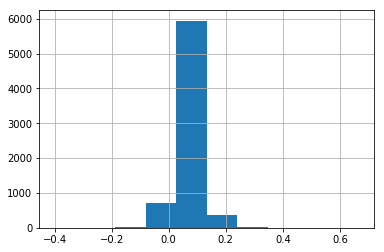

In [45]:
plt.figure(figsize=(6,4))
news_df['polarity'].hist()
plt.show()

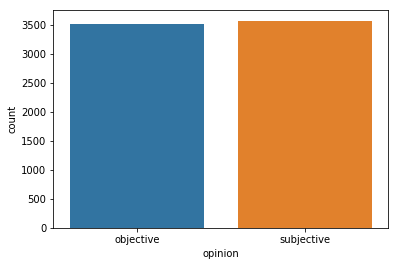

In [46]:
sns.countplot(news_df['opinion'])

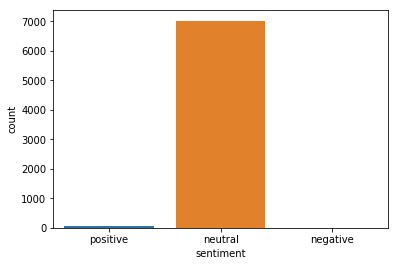

In [47]:
sns.countplot(news_df['sentiment'])

# Stock Price data

In [48]:
#import dataset
stock = pd.read_csv('Historical stock price.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5209.540039,5384.660156,5209.540039,5375.109863,5375.109863,0.0
1,2000-01-04,5533.979980,5533.979980,5376.430176,5491.009766,5491.009766,0.0
2,2000-01-05,5265.089844,5464.350098,5184.479980,5357.000000,5357.000000,0.0
3,2000-01-06,5424.209961,5489.859863,5391.330078,5421.529785,5421.529785,0.0
4,2000-01-07,5358.279785,5463.250000,5330.580078,5414.479980,5414.479980,0.0


In [49]:
stock.shape

(5202, 7)

In [50]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5.117000e+03
mean,17661.514962,17769.604422,17518.692907,17640.938622,17640.938622,7.697661e+04
std,11140.076817,11179.199340,11073.020101,11122.546076,11122.546076,1.046424e+06
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,6447.720215,6482.390137,6404.350098,6451.540039,6451.540039,8.400000e+03
50%,17149.080078,17244.539063,17022.250000,17131.080078,17131.080078,1.320000e+04
75%,26607.650391,26730.400391,26407.580078,26595.449219,26595.449219,2.020000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


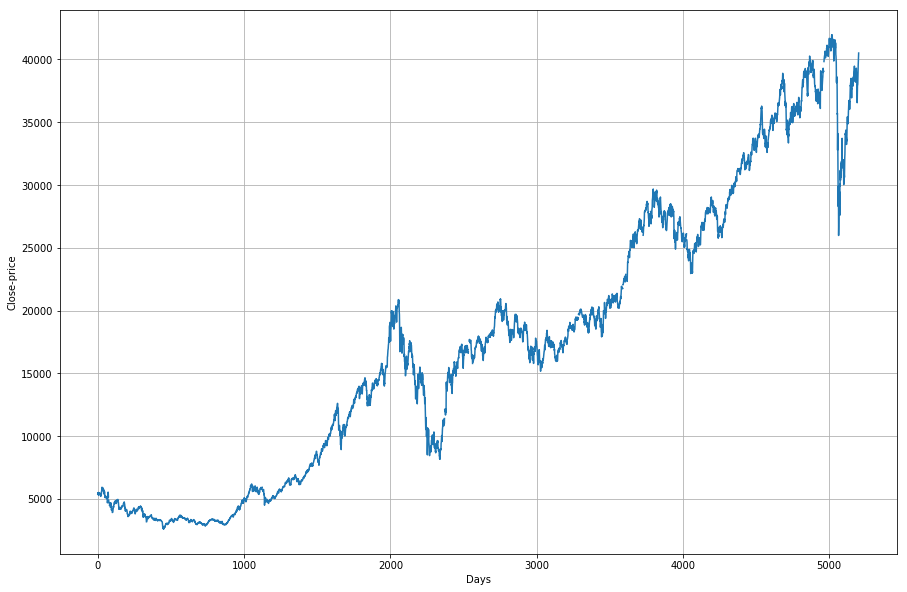

In [51]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(stock['Close'])
plt.xlabel('Days')
plt.ylabel('Close-price')
plt.show()
         

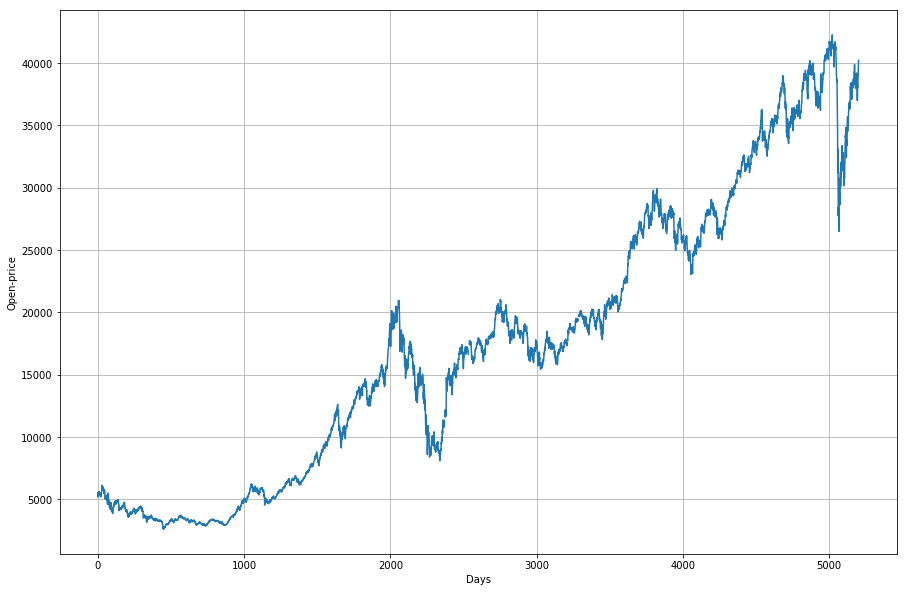

In [52]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(stock['Open'])
plt.xlabel('Days')
plt.ylabel('Open-price')
plt.show()
         

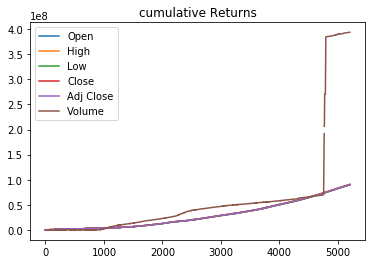

In [53]:
cumsum_data = stock.cumsum()
cumsum_data.plot()
plt.title('cumulative Returns')
plt.show()

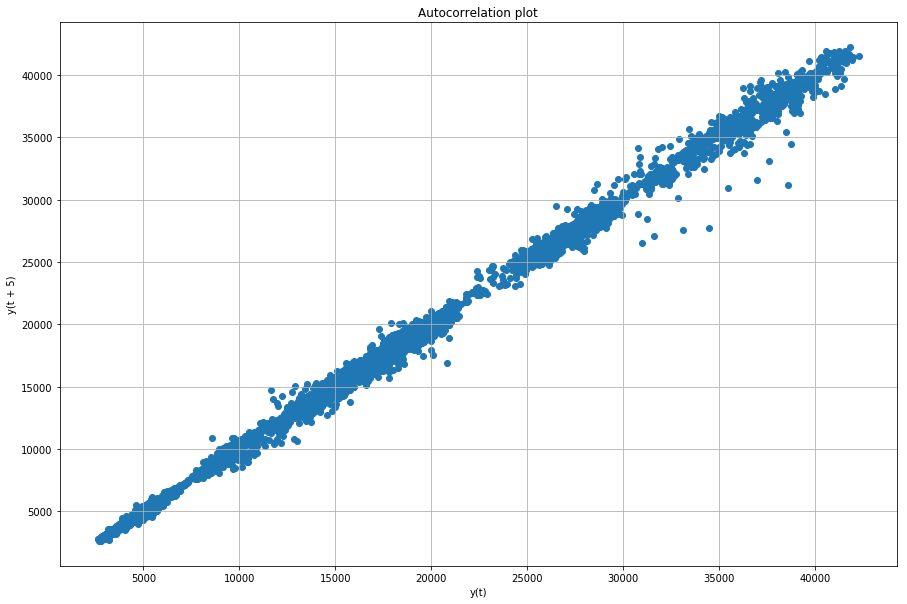

In [54]:
from pandas.plotting import lag_plot
plt.figure(figsize=(15,10))
plt.grid(True)
lag_plot(stock['Open'], lag=5)
plt.title('Autocorrelation plot')
plt.show()

In [55]:
stock['HL-prs'] = ((stock['High']-stock['Low'])/stock['Low'])*100
stock['OC-prs'] = ((stock['Close']-stock['Open'])/stock['Open'])*100

In [56]:
stock = stock.drop(['Open','High','Close','Low'],axis=1)

In [57]:
stock.head()

,Date,Adj Close,Volume,HL-prs,OC-prs
0,2000-01-03,5375.109863,0.0,3.361527,3.178204
1,2000-01-04,5491.009766,0.0,2.930379,-0.776479
2,2000-01-05,5357.000000,0.0,5.398229,1.745652
3,2000-01-06,5421.529785,0.0,1.827560,-0.049411
4,2000-01-07,5414.479980,0.0,2.488846,1.048848


In [58]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [59]:
stock.tail()

,Date,Adj Close,Volume,HL-prs,OC-prs
5197,2020-10-05,38973.699219,15500.0,1.143643,0.043428
5198,2020-10-06,39574.570313,11300.0,1.103975,0.605624
5199,2020-10-07,39878.949219,15000.0,1.311047,0.620081
5200,2020-10-08,40182.671875,14400.0,1.015042,-0.053846
5201,2020-10-09,40509.488281,16600.0,1.294897,0.704113


# create a hybrid model


In [60]:
# merge the News dataset and stock price
news_df.columns = ['Date','headline','polarity','subjectivity','sentiment','Opinion']

In [61]:
merge_data = news_df.merge(stock, how = 'inner', on = 'Date', left_index=True)

In [62]:
merge_data.head()

,Date,headline,polarity,subjectivity,sentiment,Opinion,Adj Close,Volume,HL-prs,OC-prs
260,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,positive,objective,NaN,NaN,NaN,NaN
261,2001-01-02,.Fissures in Hurriyat over Pak visit.America's...,0.113725,0.254902,neutral,subjective,4018.879883,0.0,2.524576,1.660922
262,2001-01-03,.Think again; Laxman tells Sangh Parivar.Hurri...,0.184375,0.403125,neutral,objective,4060.020020,0.0,2.264689,2.072616
263,2001-01-04,.Vajpayee gives big push to tech education; R&...,0.132492,0.473506,neutral,objective,4115.370117,0.0,1.737913,-1.569016
264,2001-01-05,.Hawkings' day out.Light combat craft takes In...,0.250480,0.455474,positive,objective,4183.729980,0.0,1.935672,1.637137


In [63]:
merge_data = merge_data.reset_index()

In [64]:
merge_data.tail()

,index,Date,headline,polarity,subjectivity,sentiment,Opinion,Adj Close,Volume,HL-prs,OC-prs
4835,5124,2020-06-23,.State sugar administration begins issuing sha...,0.072674,0.346985,neutral,subjective,35430.429688,25200.0,1.832380,1.184323
4836,5125,2020-06-24,.I never thought I had a voice until today: Vi...,0.097046,0.372516,neutral,subjective,34868.980469,26600.0,2.619983,-2.272320
4837,5126,2020-06-25,.Telangana: Senior Congress leader tests+ve fo...,0.022753,0.401195,neutral,objective,34842.101563,24600.0,1.686469,0.917328
4838,5127,2020-06-26,.up hammers out 60k proposals of rs 870cr ahea...,0.083689,0.381085,neutral,subjective,35171.269531,24800.0,0.986926,0.075369
4839,5128,2020-06-29,.Anna Eden gets creative with husband and MP H...,0.049785,0.375024,neutral,subjective,34961.519531,18300.0,1.068317,0.098979


In [65]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         4840 non-null   int64         
 1   Date          4840 non-null   datetime64[ns]
 2   headline      4840 non-null   object        
 3   polarity      4840 non-null   float64       
 4   subjectivity  4840 non-null   float64       
 5   sentiment     4840 non-null   object        
 6   Opinion       4840 non-null   object        
 7   Adj Close     4766 non-null   float64       
 8   Volume        4766 non-null   float64       
 9   HL-prs        4766 non-null   float64       
 10  OC-prs        4766 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 416.1+ KB


In [66]:
merge_data = merge_data.drop(0)

In [67]:
merge_data = merge_data[merge_data['Adj Close'].notna()]

In [68]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4766 entries, 1 to 4839
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         4766 non-null   int64         
 1   Date          4766 non-null   datetime64[ns]
 2   headline      4766 non-null   object        
 3   polarity      4766 non-null   float64       
 4   subjectivity  4766 non-null   float64       
 5   sentiment     4766 non-null   object        
 6   Opinion       4766 non-null   object        
 7   Adj Close     4766 non-null   float64       
 8   Volume        4766 non-null   float64       
 9   HL-prs        4766 non-null   float64       
 10  OC-prs        4766 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 446.8+ KB


In [69]:
merge_data = merge_data.reset_index()
merge_data.head()

,level_0,index,Date,headline,polarity,subjectivity,sentiment,Opinion,Adj Close,Volume,HL-prs,OC-prs
0,1,261,2001-01-02,.Fissures in Hurriyat over Pak visit.America's...,0.113725,0.254902,neutral,subjective,4018.879883,0.0,2.524576,1.660922
1,2,262,2001-01-03,.Think again; Laxman tells Sangh Parivar.Hurri...,0.184375,0.403125,neutral,objective,4060.020020,0.0,2.264689,2.072616
2,3,263,2001-01-04,.Vajpayee gives big push to tech education; R&...,0.132492,0.473506,neutral,objective,4115.370117,0.0,1.737913,-1.569016
3,4,264,2001-01-05,.Hawkings' day out.Light combat craft takes In...,0.250480,0.455474,positive,objective,4183.729980,0.0,1.935672,1.637137
4,5,265,2001-01-08,.Frontrunner for key US post seen having Pak t...,-0.017149,0.308747,neutral,subjective,4120.430176,0.0,2.564663,-1.064397


In [70]:
merge_data = merge_data.drop(['level_0','index'], axis=1)
merge_data.sample(3)

,Date,headline,polarity,subjectivity,sentiment,Opinion,Adj Close,Volume,HL-prs,OC-prs
2079,2009-07-08,.Tips to protect your kids from bullying.It ta...,0.046562,0.393712,neutral,subjective,13769.150391,37600.0,2.465525,-1.926195
915,2004-10-12,.Foolproof scan of cargo impossible.HPCL logs ...,0.034808,0.352110,neutral,subjective,5676.729980,18200.0,1.744593,-1.280440
2387,2010-10-12,.Modi's biopic; too hot to handle: Madhur.Nase...,0.074399,0.416964,neutral,objective,20203.339844,13400.0,1.298787,-0.758674


In [71]:
df_needed = merge_data[['Date','polarity','subjectivity','Adj Close','HL-prs','OC-prs']]
df_needed.head()

,Date,polarity,subjectivity,Adj Close,HL-prs,OC-prs
0,2001-01-02,0.113725,0.254902,4018.879883,2.524576,1.660922
1,2001-01-03,0.184375,0.403125,4060.020020,2.264689,2.072616
2,2001-01-04,0.132492,0.473506,4115.370117,1.737913,-1.569016
3,2001-01-05,0.250480,0.455474,4183.729980,1.935672,1.637137
4,2001-01-08,-0.017149,0.308747,4120.430176,2.564663,-1.064397


In [72]:
df_needed = df_needed.set_index("Date")

In [73]:
df_needed.head()

,polarity,subjectivity,Adj Close,HL-prs,OC-prs
Date,,,,,
2001-01-02,0.113725,0.254902,4018.879883,2.524576,1.660922
2001-01-03,0.184375,0.403125,4060.020020,2.264689,2.072616
2001-01-04,0.132492,0.473506,4115.370117,1.737913,-1.569016
2001-01-05,0.250480,0.455474,4183.729980,1.935672,1.637137
2001-01-08,-0.017149,0.308747,4120.430176,2.564663,-1.064397


In [74]:
scaler = MinMaxScaler()
new = pd.DataFrame(scaler.fit_transform(df_needed))
new.columns = df_needed.columns
new.index = df_needed.index
new.head()

,polarity,subjectivity,Adj Close,HL-prs,OC-prs
Date,,,,,
2001-01-02,0.481793,0.339869,0.036053,0.121478,0.611044
2001-01-03,0.555195,0.537500,0.037098,0.107422,0.632126
2001-01-04,0.501290,0.631341,0.038505,0.078930,0.445646
2001-01-05,0.623875,0.607298,0.040242,0.089626,0.609826
2001-01-08,0.345819,0.411662,0.038633,0.123646,0.471486


In [75]:
trainSet = new[: int(0.7*(len(new)))]
tsetset = new[int(0.7*(len(new))):]

In [76]:
model = VAR(endog = trainSet)
fit = model.fit()

C:\Users\Madhvi\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [77]:
pred = fit.forecast(fit.y, steps=len(tsetset))
predicted = pd.DataFrame(pred, columns = new.columns)

C:\Users\Madhvi\Anaconda2\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [78]:
predicted.head()

,polarity,subjectivity,Adj Close,HL-prs,OC-prs
0,0.440051,0.530487,0.604929,0.055138,0.518191
1,0.440601,0.529649,0.605076,0.059871,0.520200
2,0.440656,0.529439,0.605234,0.062595,0.520055
3,0.440692,0.529368,0.605394,0.064248,0.520015
4,0.440716,0.529335,0.605555,0.065247,0.519990


In [79]:
tsetset.head()

,polarity,subjectivity,Adj Close,HL-prs,OC-prs
Date,,,,,
2014-08-19,0.441405,0.513500,0.605312,0.014207,0.514024
2014-08-20,0.473203,0.555331,0.602609,0.031636,0.490817
2014-08-21,0.440534,0.546443,0.603773,0.026591,0.533277
2014-08-22,0.458091,0.533749,0.605284,0.010580,0.525996
2014-08-25,0.478084,0.562549,0.605728,0.031865,0.515690


In [80]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(predicted['Adj Close'], tsetset['Adj Close']))
print('Mean squared Error:', metrics.mean_squared_error(predicted['Adj Close'], tsetset['Adj Close']))

Mean Absolute Error: 0.06594352281589783
Mean squared Error: 0.006417705162540776


# Submitted by Madhvi Singh Thakur

In [ ]:
-